# Import Qchem files

In [1]:
import import_qchem
import utils
import math
import numpy as np
import json

In [2]:
n_energy, n_dihedral, n_errors = import_qchem.get_energy_dihedral('./pt_cust_dft_full')

In [3]:
c_energy, c_dihedral, c_errors = import_qchem.get_energy_dihedral('./charged_dft_b3lyp_out/')

# Fit neutral dihedral potential

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from scipy.optimize import curve_fit

In [6]:
n_rel_eV_energy = utils.relative_energy(n_energy)
n_params, n_covar = curve_fit(utils.RB_potential, n_dihedral, n_rel_eV_energy)

In [7]:
# create list of angles and corresponding energies
n_angles = np.linspace(-180, 180, 3600)
n_RB_energy = [utils.RB_potential(angle, *n_params) for angle in n_angles]

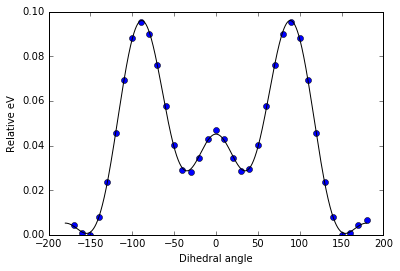

In [8]:
plt.figure()
plt.plot(n_dihedral, n_rel_eV_energy, 'o', n_angles, n_RB_energy, 'black')
plt.xlabel('Dihedral angle')
plt.ylabel('Relative eV')
plt.show()

# Boltzmann distribution

In [9]:
n_prob_700 = utils.boltz_dist(700.0, n_RB_energy)

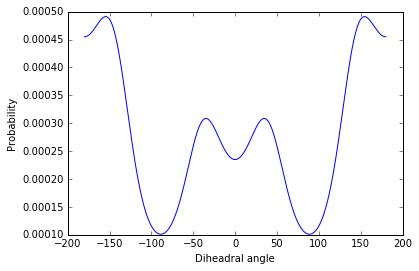

In [10]:
plt.figure()
plt.plot(n_angles, n_prob_700)
plt.xlabel('Diheadral angle')
plt.ylabel('Probability')
plt.show()

# Cumulative probability

In [11]:
n_cum_prob = [sum(n_prob_700[0:prob_i]) for prob_i in range(len(n_prob_700))]

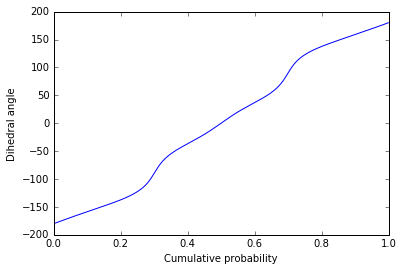

In [12]:
plt.figure()
plt.plot(n_cum_prob, n_angles)
plt.xlabel('Cumulative probability')
plt.ylabel('Dihedral angle')
plt.show()

In [13]:
n_prob_angle = np.array(zip(n_cum_prob, n_angles))

# Sampling neutral chain

In [14]:
n_ave_ete = np.array(utils.read_json('pt_n_m100_t700_20000_ete.json'))
n_ave_corr = np.array(utils.read_json('pt_n_m100_t700_20000_corr.json'))

### Plot end-to-end distance 

In [15]:
monomer_num = 100

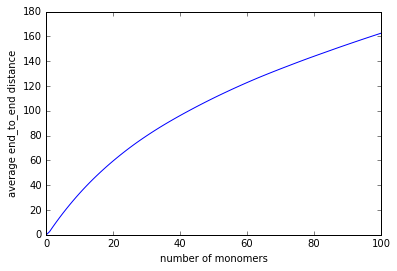

In [16]:
plt.figure()
plt.plot(range(0, monomer_num + 1, 1), n_ave_ete)
plt.xlabel('number of monomers')
plt.ylabel('average end_to_end distance')
plt.show()

### Plot end-to-end distance  

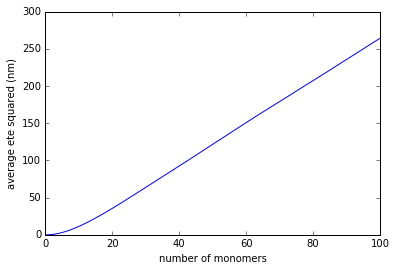

In [17]:
plt.figure()
plt.plot(range(0, monomer_num + 1, 1), ((n_ave_ete * n_ave_ete)*0.01))
plt.xlabel('number of monomers')
plt.ylabel('average ete squared (nm)')
plt.show()

   ### Plot tangent-tangent correlation function

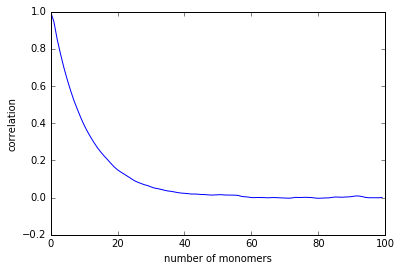

In [18]:
plt.figure()
plt.plot(range(0, monomer_num, 1), n_ave_corr)
plt.xlabel('number of monomers')
plt.ylabel('correlation')
plt.show()

In [19]:
ln_n_corr = np.log(n_ave_corr[1:25])
x_vals = range(1, 25, 1)

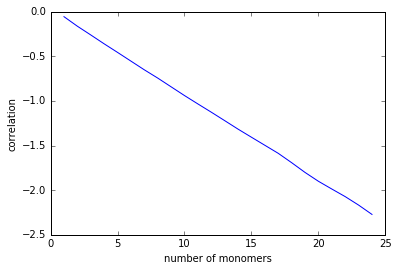

In [20]:
plt.figure()
plt.plot(x_vals, ln_n_corr)
plt.xlabel('number of monomers')
plt.ylabel('correlation')
plt.show()

In [21]:
corr_lfit = np.polyfit(x_vals, ln_n_corr, 1)

In [22]:
np_pt = -1 / corr_lfit[0]

In [23]:
h = np.sqrt(2.548**2 + 1.480**2 - (2 * 2.548 * 1.480 * np.cos(165.0* np.pi/180.0))) / 10

In [24]:
np_pt * h

4.1810097897794449

# Correlation length
## ~ 4 nm

# Fit charged dihedral potential

In [25]:
c_rel_eV_energy = utils.relative_energy(c_energy)
c_params, c_covar = curve_fit(utils.RB_potential,c_dihedral,c_rel_eV_energy)

In [26]:
# create list of angles and corresponding energies
c_angles = np.linspace(-180, 180, 3600)
c_RB_energy = [utils.RB_potential(angle, *c_params) for angle in c_angles]

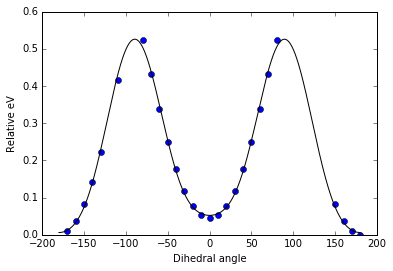

In [27]:
plt.figure()
plt.plot(c_dihedral, c_rel_eV_energy, 'o', c_angles, c_RB_energy, 'black')
plt.xlabel('Dihedral angle')
plt.ylabel('Relative eV')
plt.show()

# Charged Boltzmann distribution

In [28]:
c_prob_700 = utils.boltz_dist(700.0, c_RB_energy)

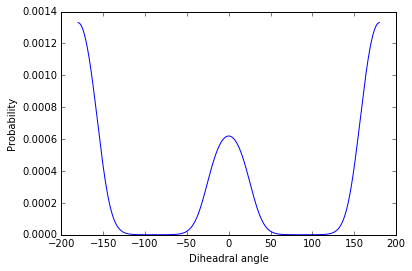

In [29]:
plt.figure()
plt.plot(c_angles, c_prob_700)
plt.xlabel('Diheadral angle')
plt.ylabel('Probability')
plt.show()

In [30]:
c_cum_prob = [sum(c_prob_700[0:prob_i]) for prob_i in range(len(c_prob_700))]

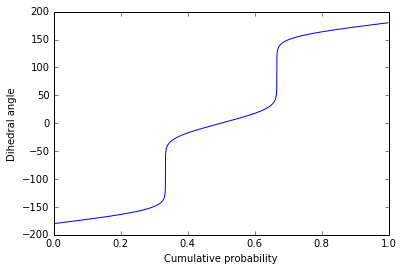

In [31]:
plt.figure()
plt.plot(c_cum_prob, c_angles)
plt.xlabel('Cumulative probability')
plt.ylabel('Dihedral angle')
plt.show()

In [32]:
c_prob_angle = np.array(zip(c_cum_prob, c_angles))

# Sampling charged chain

In [33]:
ete_26 = utils.read_json('pt_c_m26_t700_15000_ete.json')
ete_50 = utils.read_json('pt_c_m50_t700_15000_ete.json')
ete_100 = utils.read_json('pt_c_m100_t700_15000_ete.json')
c_ave_ete = np.array([ete_26, ete_50, ete_100])

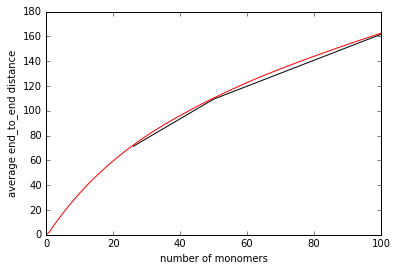

In [34]:
plt.figure()
plt.plot([26,50,100], c_ave_ete, 'black', range(0, monomer_num + 1, 1), n_ave_ete, 'red')
plt.xlabel('number of monomers')
plt.ylabel('average end_to_end distance')
plt.show()

In [35]:
c_ave_corr = np.array(utils.read_json('pt_c_m26_t700_15000_corr.json'))
len(c_ave_corr)

26

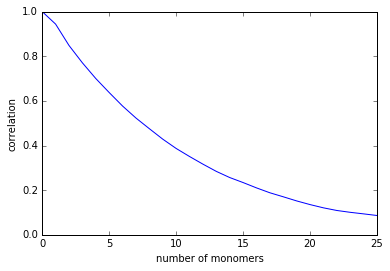

In [36]:
plt.figure()
plt.plot(range(0, 26, 1), c_ave_corr)
plt.xlabel('number of monomers')
plt.ylabel('correlation')
plt.show()

In [37]:
# Visualize charged polymer

In [38]:
from polymer_chain import Polymer

In [39]:
monomer_num = 150
monomer_len = 2.548
link_len = 1.480
link_angle = 15.0
sample_num = 1

In [40]:
pt = Polymer(monomer_num, monomer_len, link_len, link_angle, c_prob_angle, sample_num, c_prob_angle)

In [41]:
pt.build_chain() 
n_chain, n_ete_test, c_chain, c_ete_test = pt.relax_charged_chain(30, values=True)

In [42]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

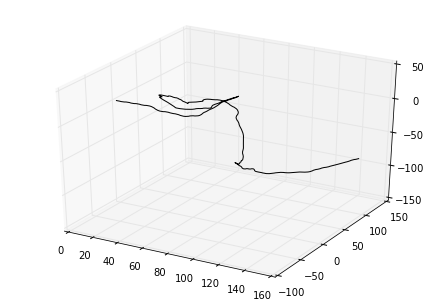

In [43]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(n_chain[:,0], n_chain[:,1], n_chain[:,2], 'black')

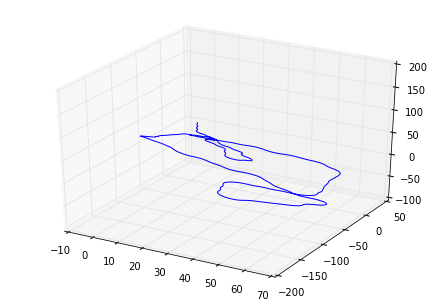

In [44]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(c_chain[:,0], c_chain[:,1], c_chain[:,2])

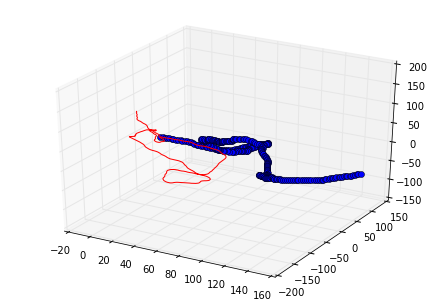

In [45]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(n_chain[:,0], n_chain[:,1], n_chain[:,2], 'o')
ax.plot(c_chain[:,0], c_chain[:,1], c_chain[:,2], 'red')

In [46]:
int(math.ceil(1.5))

2

In [47]:
int(math.ceil(1/2))

0

In [48]:
int(math.ceil(1/2.0))

1

In [49]:
int(math.ceil(2/2.0))

1

In [50]:
int(math.ceil(3/2.0))

2

In [51]:
links = 3
for i in range(links):
    links, excluded = [], []
    test_link = np.random.randint(5, 50)
    if test_link != excluded:
        links.append(test_link)
        excluded.append([test_link - 1, test_link, test_link + 1])

In [52]:
link_pos = []
while len(link_pos) < 4:
    test_link = np.random.randint(5, 50)
    if test_link != link_pos:
        link_pos.append(test_link)

In [53]:
#def pick_links(sites)
    link_pos = []
    excluded = []
    while len(link_pos) < 40:
        test_link = np.random.randint(5, 95)
        if test_link not in excluded:
            link_pos.append(test_link)
            excluded.extend([test_link - 1, test_link, test_link + 1])
print excluded

IndentationError: unexpected indent (<ipython-input-53-f356a9d12237>, line 2)